# 📓 Notebook - Teori & Praktik Bab 4: Melatih Model

Selamat datang di notebook panduan untuk Bab 4! Bab ini menyelami lebih dalam cara kerja beberapa model Machine Learning, terutama model linear, dan bagaimana kita melatihnya. Kita akan membahas:

1. **Regresi Linear**: Cara melatihnya menggunakan Persamaan Normal dan Gradient Descent.
2. **Regresi Polinomial**: Untuk data yang tidak linear.
3. **Kurva Belajar**: Mendiagnosis *underfitting* dan *overfitting*.
4. **Model Linear Teregulasi**: Ridge, Lasso, Elastic Net, dan Early Stopping untuk mengatasi *overfitting*.
5. **Regresi Logistik & Softmax**: Untuk tugas klasifikasi.

## 1. Regresi Linear

**Teori  :**
Model Regresi Linear adalah model paling sederhana. Ia memprediksi nilai target (ŷ) sebagai **jumlah terbobot** dari fitur input (xᵢ) ditambah konstanta yang disebut **bias term** (θ₀).

Formula:
ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θ<0xE2><0x82><0x99>x<0xE2><0x82><0x99>

Di mana:
- ŷ adalah nilai prediksi.
- n adalah jumlah fitur.
- xᵢ adalah nilai fitur ke-i.
- θⱼ adalah parameter model ke-j (θ₀ adalah bias, θ₁, ..., θ<0xE2><0x82><0x99> adalah bobot fitur).

**Melatih model** berarti menemukan nilai parameter (θ) yang paling **pas** (meminimalkan *cost function*) untuk data latih. Metrik performa umum untuk regresi adalah **Root Mean Square Error (RMSE)**. Namun, dalam pelatihan, kita biasanya meminimalkan **Mean Squared Error (MSE)** karena lebih mudah dihitung turunannya, dan meminimalkan MSE sama dengan meminimalkan RMSE.

### a. Persamaan Normal (Normal Equation)

**Teori  :**
Ini adalah solusi matematis langsung (persamaan *closed-form*) untuk menemukan nilai θ yang meminimalkan MSE. Tidak perlu iterasi.

Formula:
θ̂ = (Xᵀ X)⁻¹ Xᵀ y

Di mana:
- θ̂ adalah nilai θ yang meminimalkan *cost function*.
- X adalah matriks fitur input (dengan kolom x₀=1 ditambahkan untuk bias).
- y adalah vektor nilai target.
- Xᵀ adalah transpose dari X.
- ( )⁻¹ adalah invers dari matriks.

**Kelebihan:** Cepat untuk jumlah fitur yang tidak terlalu banyak.
**Kekurangan:** Menjadi sangat lambat jika jumlah fitur (n) besar (kompleksitas sekitar O(n²·⁴) hingga O(n³)). Membutuhkan semua data muat di memori.

Theta terbaik (Normal Equation):
[[4.21509616]
 [2.77011339]]

Prediksi untuk X=0 dan X=2:
[[4.21509616]
 [9.75532293]]


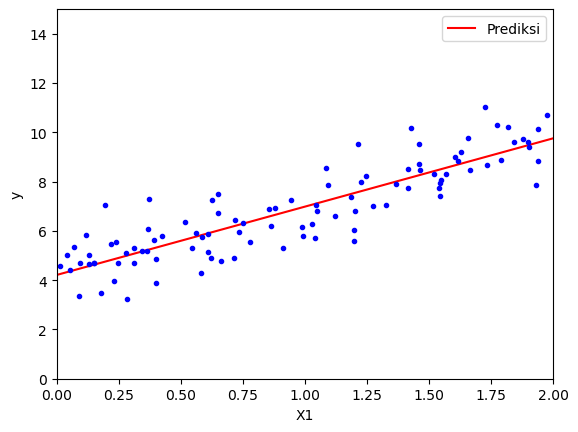

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Buat data linear acak
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + noise

# Tambahkan x0 = 1 ke setiap instance (untuk bias term)
X_b = np.c_[np.ones((100, 1)), X] 

# Hitung theta terbaik menggunakan Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Theta terbaik (Normal Equation):")
print(theta_best)

# Buat prediksi
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print("\nPrediksi untuk X=0 dan X=2:")
print(y_predict)

# Plot hasil
plt.plot(X_new, y_predict, "r-", label="Prediksi")
plt.plot(X, y, "b.")
plt.xlabel("X1")
plt.ylabel("y")
plt.legend()
plt.axis([0, 2, 0, 15])
plt.show()

In [2]:
# Cara yang sama menggunakan Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("\nTheta terbaik (Scikit-Learn):")
print(f"Intercept (theta0): {lin_reg.intercept_[0]}")
print(f"Coefficient (theta1): {lin_reg.coef_[0][0]}")
print("\nPrediksi (Scikit-Learn):")
print(lin_reg.predict(X_new))


Theta terbaik (Scikit-Learn):
Intercept (theta0): 4.215096157546748
Coefficient (theta1): 2.770113386438483

Prediksi (Scikit-Learn):
[[4.21509616]
 [9.75532293]]


### b. Gradient Descent (GD)

**Teori  :**
Gradient Descent adalah algoritma optimasi iteratif yang secara bertahap menyesuaikan parameter model (θ) untuk meminimalkan *cost function* (MSE).

Cara kerjanya:
1. Inisialisasi θ dengan nilai acak.
2. Hitung gradien (turunan parsial) dari *cost function* terhadap setiap parameter θⱼ.
3. Perbarui θ dengan bergerak ke arah *berlawanan* dari gradien (menuruni "lembah" *cost function*).
4. Ulangi langkah 2 & 3 hingga konvergen (gradien mendekati nol).

**Hyperparameter Penting:**
- **Learning Rate (η):** Ukuran langkah pada setiap iterasi. Jika terlalu kecil, konvergensi lambat. Jika terlalu besar, bisa melompati minimum atau bahkan divergen.

**Tantangan:**
- Bisa terjebak di *local minimum* (tidak masalah untuk MSE Regresi Linear karena bentuknya cembung/convex).
- Jika fitur tidak diskalakan (memiliki rentang nilai sangat berbeda), konvergensi bisa sangat lambat.

**Jenis-jenis Gradient Descent:**
- **Batch GD:** Menghitung gradien berdasarkan *seluruh* data latih pada setiap langkah. Lambat untuk dataset besar.
- **Stochastic GD (SGD):** Menghitung gradien berdasarkan *satu* instance acak pada setiap langkah. Cepat per iterasi, tapi lebih tidak stabil (berosilasi). Baik untuk dataset sangat besar & *online learning*.
- **Mini-batch GD:** Menghitung gradien berdasarkan *kelompok kecil* (mini-batch) instance acak. Kompromi antara Batch GD dan SGD, seringkali yang paling efisien.

In [3]:
# Implementasi Batch Gradient Descent sederhana

eta = 0.1  # Learning rate
n_iterations = 1000
m = 100 # Jumlah instance

theta = np.random.randn(2,1)  # Inisialisasi acak [theta0, theta1]

for iteration in range(n_iterations):
    # Hitung gradien berdasarkan seluruh batch (X_b)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    # Perbarui theta
    theta = theta - eta * gradients

print("Theta terbaik (Batch GD):")
print(theta)

# Hasilnya harus sangat mirip dengan Normal Equation

Theta terbaik (Batch GD):
[[4.21509616]
 [2.77011339]]


In [4]:
# Implementasi Stochastic Gradient Descent (SGD) sederhana

n_epochs = 50
t0, t1 = 5, 50  # Hyperparameter untuk learning schedule

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # Inisialisasi acak

for epoch in range(n_epochs):
    for i in range(m):
        # Pilih satu instance acak
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        # Hitung gradien berdasarkan satu instance
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        
        # Tentukan learning rate untuk iterasi ini
        eta = learning_schedule(epoch * m + i)
        
        # Perbarui theta
        theta = theta - eta * gradients

print("Theta terbaik (SGD):")
print(theta)

Theta terbaik (SGD):
[[4.18475289]
 [2.73036719]]


In [5]:
# SGD menggunakan Scikit-Learn (lebih praktis)
from sklearn.linear_model import SGDRegressor

# max_iter: jumlah epoch, tol: kriteria berhenti, penalty=None: tanpa regularisasi
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
# y.ravel() mengubah y menjadi array 1D
sgd_reg.fit(X, y.ravel()) 

print("\nTheta terbaik (SGD Scikit-Learn):")
print(f"Intercept (theta0): {sgd_reg.intercept_[0]}")
print(f"Coefficient (theta1): {sgd_reg.coef_[0]}")


Theta terbaik (SGD Scikit-Learn):
Intercept (theta0): 4.243652860329604
Coefficient (theta1): 2.8250878043833314


## 2. Regresi Polinomial

**Teori  :**
Bagaimana jika data Anda tidak lurus (non-linear)? Kita masih bisa menggunakan model linear! Caranya adalah dengan **menambahkan fitur baru** yang merupakan **pangkat** dari fitur yang sudah ada (misalnya, x², x³). Kemudian, latih model linear pada data yang sudah diperluas ini.

Contoh: Jika Anda punya fitur x₁, Anda bisa menambahkan fitur baru x₁². Modelnya menjadi:
ŷ = θ₀ + θ₁x₁ + θ₂x₁²

Meskipun model ini kuadratik terhadap fitur asli, ia tetap **linear terhadap parameter** θ₀, θ₁, θ₂, sehingga kita masih bisa menggunakan teknik Regresi Linear biasa.

Fitur asli: [0.48570228]
Fitur setelah transformasi (x, x^2): [0.48570228 0.2359067 ]

Theta (polinomial):
Intercept (theta0): 1.8699326992289473
Coefficients (theta1, theta2): [0.99763195 0.51104433]


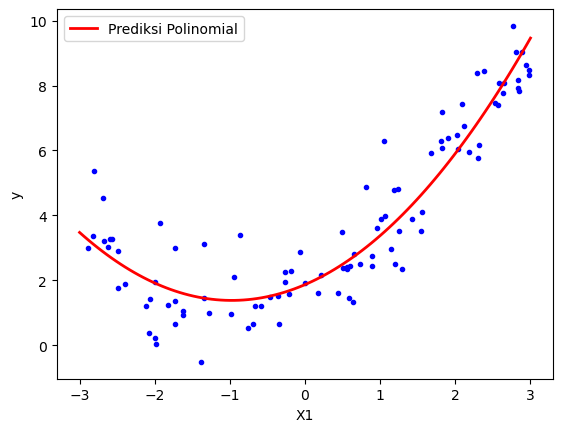

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# Buat data kuadratik acak
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # y = 0.5x^2 + x + 2 + noise

# Tambahkan fitur polinomial (derajat 2)
# include_bias=False karena LinearRegression sudah menangani bias
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print("Fitur asli:", X[0])
print("Fitur setelah transformasi (x, x^2):", X_poly[0])

# Latih model Linear Regression pada fitur yang sudah ditransformasi
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("\nTheta (polinomial):")
print(f"Intercept (theta0): {lin_reg.intercept_[0]}")
print(f"Coefficients (theta1, theta2): {lin_reg.coef_[0]}")

# Plot hasil
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new_predict = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new_predict, "r-", linewidth=2, label="Prediksi Polinomial")
plt.xlabel("X1")
plt.ylabel("y")
plt.legend()
plt.show()

## 3. Kurva Belajar (Learning Curves)

**Teori  :**
Kurva belajar adalah plot performa model (misalnya RMSE) pada *training set* dan *validation set* sebagai fungsi dari ukuran *training set*.

Kurva ini sangat berguna untuk mendiagnosis masalah:
- **Underfitting:** Jika kedua kurva (training & validation) mencapai *plateau* (mendatar) pada tingkat error yang tinggi dan saling berdekatan, modelnya kemungkinan *underfitting*. Menambahkan lebih banyak data tidak akan membantu; Anda perlu model yang lebih kompleks atau fitur yang lebih baik.
- **Overfitting:** Jika ada *gap* (celah) yang signifikan antara kurva training (error rendah) dan kurva validation (error jauh lebih tinggi), modelnya kemungkinan *overfitting*. Menambahkan lebih banyak data bisa membantu, atau Anda perlu menyederhanakan/meregulasi model.

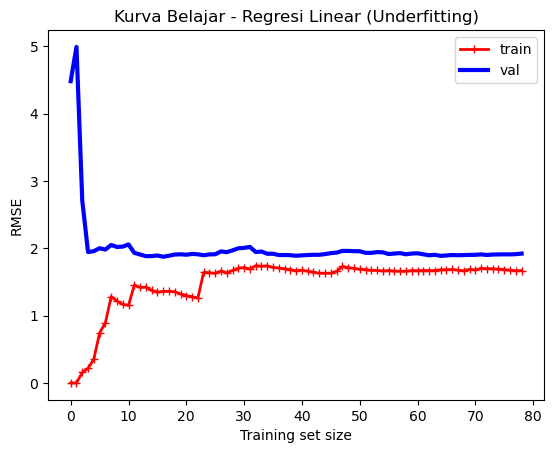

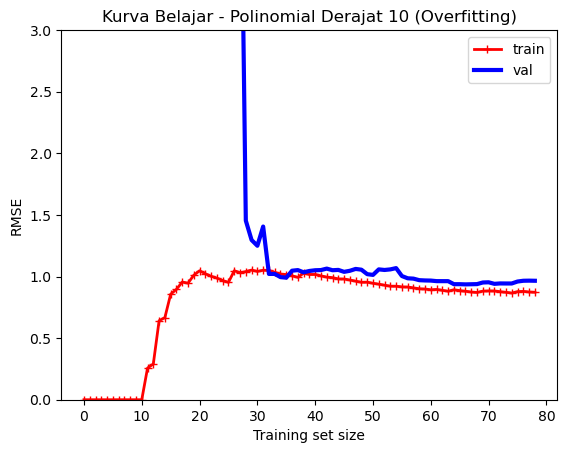

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

# Kurva belajar untuk model linear (underfitting)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.title("Kurva Belajar - Regresi Linear (Underfitting)")
plt.show()

# Kurva belajar untuk model polinomial derajat 10 (overfitting)
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.title("Kurva Belajar - Polinomial Derajat 10 (Overfitting)")
plt.ylim(0, 3) # Batasi sumbu y agar lebih jelas
plt.show()

## 4. Model Linear Teregulasi

**Teori  :**
Untuk mengurangi *overfitting*, kita bisa **meregulasi** model, yaitu membatasi kompleksitasnya. Untuk model linear, ini biasanya dilakukan dengan **membatasi bobot (weights)** model.

Tiga jenis regularisasi yang umum:

### a. Ridge Regression (Regulasi L2)

**Teori  :**
Menambahkan *penalty term* ke *cost function* yang besarnya sebanding dengan **kuadrat dari norma L2** vektor bobot (Σ θᵢ²). Ini memaksa algoritma untuk menjaga bobot sekecil mungkin.

- **Hyperparameter α:** Mengontrol seberapa besar regularisasi (α=0 berarti tanpa regularisasi, α besar berarti bobot mendekati nol).
- **Penting:** Fitur harus diskalakan sebelum menggunakan Ridge.
- Tidak menghilangkan fitur (bobot mendekati nol, tapi tidak pernah persis nol).

In [8]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Data perlu diskalakan
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ridge_reg = Ridge(alpha=1, solver="cholesky") # alpha adalah parameter regularisasi
ridge_reg.fit(X_scaled, y)

print("Prediksi Ridge (alpha=1):")
print(ridge_reg.predict(scaler.transform(X_new)))

Prediksi Ridge (alpha=1):
[0.25660051 0.32266954 0.38873857 0.4548076  0.52087663 0.58694566
 0.65301469 0.71908372 0.78515275 0.85122178 0.91729081 0.98335983
 1.04942886 1.11549789 1.18156692 1.24763595 1.31370498 1.37977401
 1.44584304 1.51191207 1.5779811  1.64405012 1.71011915 1.77618818
 1.84225721 1.90832624 1.97439527 2.0404643  2.10653333 2.17260236
 2.23867139 2.30474041 2.37080944 2.43687847 2.5029475  2.56901653
 2.63508556 2.70115459 2.76722362 2.83329265 2.89936168 2.9654307
 3.03149973 3.09756876 3.16363779 3.22970682 3.29577585 3.36184488
 3.42791391 3.49398294 3.56005197 3.626121   3.69219002 3.75825905
 3.82432808 3.89039711 3.95646614 4.02253517 4.0886042  4.15467323
 4.22074226 4.28681129 4.35288031 4.41894934 4.48501837 4.5510874
 4.61715643 4.68322546 4.74929449 4.81536352 4.88143255 4.94750158
 5.0135706  5.07963963 5.14570866 5.21177769 5.27784672 5.34391575
 5.40998478 5.47605381 5.54212284 5.60819187 5.67426089 5.74032992
 5.80639895 5.87246798 5.93853701 6.00

### b. Lasso Regression (Regulasi L1)

**Teori  :**
Mirip dengan Ridge, tetapi menggunakan **norma L1** dari vektor bobot (Σ |θᵢ|). Ciri khasnya adalah ia cenderung **menghilangkan bobot fitur yang paling tidak penting** (menjadikannya persis nol).

- Berguna untuk **seleksi fitur otomatis**.
- Bisa tidak stabil jika fitur saling berkorelasi kuat atau jika jumlah fitur > jumlah instance.

In [9]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_scaled, y)

print("Prediksi Lasso (alpha=0.1):")
print(lasso_reg.predict(scaler.transform(X_new)))

Prediksi Lasso (alpha=0.1):
[0.40251554 0.4658694  0.52922325 0.59257711 0.65593096 0.71928482
 0.78263868 0.84599253 0.90934639 0.97270025 1.0360541  1.09940796
 1.16276181 1.22611567 1.28946953 1.35282338 1.41617724 1.47953109
 1.54288495 1.60623881 1.66959266 1.73294652 1.79630038 1.85965423
 1.92300809 1.98636194 2.0497158  2.11306966 2.17642351 2.23977737
 2.30313123 2.36648508 2.42983894 2.49319279 2.55654665 2.61990051
 2.68325436 2.74660822 2.80996208 2.87331593 2.93666979 3.00002364
 3.0633775  3.12673136 3.19008521 3.25343907 3.31679292 3.38014678
 3.44350064 3.50685449 3.57020835 3.63356221 3.69691606 3.76026992
 3.82362377 3.88697763 3.95033149 4.01368534 4.0770392  4.14039306
 4.20374691 4.26710077 4.33045462 4.39380848 4.45716234 4.52051619
 4.58387005 4.6472239  4.71057776 4.77393162 4.83728547 4.90063933
 4.96399319 5.02734704 5.0907009  5.15405475 5.21740861 5.28076247
 5.34411632 5.40747018 5.47082404 5.53417789 5.59753175 5.6608856
 5.72423946 5.78759332 5.85094717 5

### c. Elastic Net

**Teori  :**
Merupakan **jalan tengah** antara Ridge dan Lasso. *Penalty term*-nya adalah campuran dari L1 dan L2, dikontrol oleh rasio campuran *r*.

- Jika r=0, sama dengan Ridge.
- Jika r=1, sama dengan Lasso.
- Umumnya lebih disukai daripada Lasso karena lebih stabil.
- Punya dua hyperparameter untuk di-tune: α dan r (disebut `l1_ratio` di Scikit-Learn).

In [10]:
from sklearn.linear_model import ElasticNet

# alpha = kekuatan regularisasi, l1_ratio = rasio campuran (r)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) 
elastic_net.fit(X_scaled, y)

print("Prediksi Elastic Net (alpha=0.1, l1_ratio=0.5):")
print(elastic_net.predict(scaler.transform(X_new)))

Prediksi Elastic Net (alpha=0.1, l1_ratio=0.5):
[0.47825198 0.54019654 0.6021411  0.66408566 0.72603022 0.78797478
 0.84991934 0.9118639  0.97380846 1.03575302 1.09769758 1.15964214
 1.2215867  1.28353126 1.34547582 1.40742038 1.46936494 1.5313095
 1.59325406 1.65519862 1.71714317 1.77908773 1.84103229 1.90297685
 1.96492141 2.02686597 2.08881053 2.15075509 2.21269965 2.27464421
 2.33658877 2.39853333 2.46047789 2.52242245 2.58436701 2.64631157
 2.70825613 2.77020069 2.83214525 2.89408981 2.95603437 3.01797893
 3.07992349 3.14186805 3.20381261 3.26575717 3.32770173 3.38964629
 3.45159085 3.51353541 3.57547997 3.63742453 3.69936909 3.76131365
 3.82325821 3.88520277 3.94714733 4.00909189 4.07103645 4.13298101
 4.19492557 4.25687013 4.31881469 4.38075924 4.4427038  4.50464836
 4.56659292 4.62853748 4.69048204 4.7524266  4.81437116 4.87631572
 4.93826028 5.00020484 5.0621494  5.12409396 5.18603852 5.24798308
 5.30992764 5.3718722  5.43381676 5.49576132 5.55770588 5.61965044
 5.681595   5.7

### d. Early Stopping

**Teori  :**
Cara yang sangat berbeda untuk meregulasi algoritma iteratif seperti Gradient Descent. Idenya adalah **menghentikan pelatihan** segera setelah **error pada validation set mencapai minimum**.

- Sangat sederhana dan efektif.
- Membutuhkan pemantauan performa pada validation set selama pelatihan.

In [18]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Buat set training dan validasi untuk Early Stopping
# Kita buat variabel X_train, X_val, y_train, y_val di sini
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Siapkan data (skala fitur, tambahkan fitur polinomial)
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), # Derajat tinggi -> overfitting
    ("std_scaler", StandardScaler())
])

# 3. Terapkan pipeline ke data yang sudah di-split
# fit_transform HANYA pada X_train
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
# transform HANYA pada X_val
X_val_poly_scaled = poly_scaler.transform(X_val)

# 4. Gunakan SGDRegressor untuk simulasi early stopping
# (Perbaikan dari error sebelumnya: tol=None)
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
n_epochs = 1000

print("Memulai pelatihan Early Stopping...")
for epoch in range(n_epochs):
    # 5. Latih dengan data yang jumlahnya konsisten (80 sampel)
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())  # Lanjutkan pelatihan
    
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

print(f"\nEpoch terbaik: {best_epoch}")
print(f"RMSE Validation terbaik: {np.sqrt(minimum_val_error):.4f}")

Memulai pelatihan Early Stopping...

Epoch terbaik: 7
RMSE Validation terbaik: 3.5927


## 5. Regresi Logistik (Logistic Regression)

**Teori  :**
Meskipun namanya "regresi", Regresi Logistik adalah algoritma **klasifikasi biner** yang populer.

Cara kerjanya:
1. Menghitung jumlah terbobot dari fitur input (seperti Regresi Linear).
2. Mengirimkan hasilnya ke **fungsi logistik (sigmoid)**, σ(t) = 1 / (1 + exp(-t)). Fungsi ini menghasilkan output antara 0 dan 1.
3. Hasilnya diinterpretasikan sebagai **probabilitas** instance termasuk dalam kelas positif (kelas 1).
4. Jika probabilitas > 0.5 (atau threshold lain), model memprediksi kelas 1, jika tidak, kelas 0.

**Pelatihan:**
Tujuannya adalah mengatur parameter θ agar model memberikan probabilitas tinggi untuk instance positif dan probabilitas rendah untuk instance negatif. *Cost function* yang umum digunakan adalah **Log Loss (Cross-Entropy)**. Karena *cost function* ini cembung (convex), Gradient Descent dijamin menemukan minimum global.

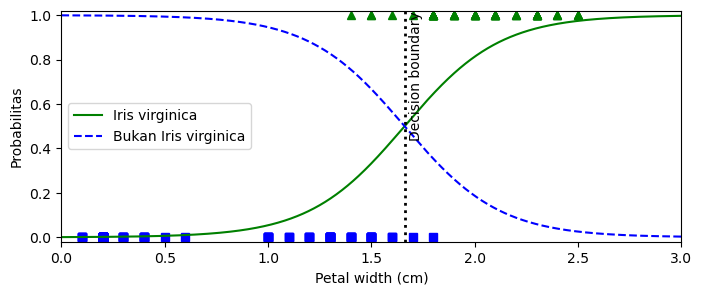

Decision boundary pada petal width: 1.66 cm
Prediksi untuk 1.7 cm: [1]
Prediksi untuk 1.5 cm: [0]


In [20]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Gunakan dataset iris
iris = datasets.load_iris()
X = iris["data"][:, 3:]  # Fitur: petal width

# PERBAIKAN: Ganti np.int dengan int (atau np.int32)
y = (iris["target"] == 2).astype(int)  # Target: 1 jika Iris virginica, 0 jika bukan

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

# Buat data baru untuk prediksi probabilitas
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

# Temukan decision boundary (dimana probabilitas ~ 50%)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs") # Bukan Virginica
plt.plot(X[y==1], y[y==1], "g^") # Virginica
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Bukan Iris virginica")
plt.plot([decision_boundary, decision_boundary], [-0.02, 1.02], "k:", linewidth=2)
plt.text(decision_boundary+0.02, 0.45, "Decision boundary", rotation=90)
plt.xlabel("Petal width (cm)")
plt.ylabel("Probabilitas")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.show()

print(f"Decision boundary pada petal width: {decision_boundary[0]:.2f} cm")
print("Prediksi untuk 1.7 cm:", log_reg.predict([[1.7]]))
print("Prediksi untuk 1.5 cm:", log_reg.predict([[1.5]]))

## 6. Regresi Softmax (Softmax Regression)

**Teori  :**
Regresi Logistik dapat digeneralisasi untuk mendukung **klasifikasi multikelas** (lebih dari dua kelas) secara langsung, tanpa perlu melatih banyak pengklasifikasi biner. Ini disebut Regresi Softmax atau *Multinomial Logistic Regression*.

Cara kerjanya:
1. Untuk setiap instance, model menghitung **skor** (s<0xE2><0x82><0x96>(x)) untuk setiap kelas *k*.
2. Skor ini kemudian dilewatkan ke **fungsi softmax**, yang menghitung probabilitas (p̂<0xE2><0x82><0x96>) untuk setiap kelas.
   Formula Softmax: p̂<0xE2><0x82><0x96> = exp(s<0xE2><0x82><0x96>(x)) / Σ[exp(s<0xE2><0x82><0x97>(x))] untuk semua kelas j.
3. Model memprediksi kelas dengan probabilitas tertinggi.

**Penting:** Regresi Softmax hanya cocok untuk **kelas yang saling eksklusif** (mutually exclusive), artinya setiap instance hanya bisa termasuk dalam satu kelas.

**Pelatihan:**
Tujuannya adalah membuat model menghasilkan probabilitas tinggi untuk kelas target dan rendah untuk kelas lain. *Cost function*-nya adalah **Cross-Entropy**.

In [21]:
# Gunakan dataset iris dengan 3 kelas
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"] # Target: 0, 1, atau 2

# Gunakan LogisticRegression dengan multi_class='multinomial'
# Solver 'lbfgs' mendukung softmax.
# C adalah invers dari kekuatan regularisasi alpha (C besar = sedikit regularisasi)
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

# Prediksi kelas untuk bunga baru (petal length=5, width=2)
print("Prediksi kelas untuk [5, 2]:", softmax_reg.predict([[5, 2]]))
print("Probabilitas per kelas:", softmax_reg.predict_proba([[5, 2]]))

# Insight: Model memprediksi kelas 2 (Iris Virginica) dengan probabilitas tinggi (sekitar 94.2%).

Prediksi kelas untuk [5, 2]: [2]
Probabilitas per kelas: [[6.21626372e-07 5.73689802e-02 9.42630398e-01]]


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Kesimpulan Bab 4

Bab ini memperkenalkan berbagai cara untuk melatih model linear (dan polinomial), mulai dari solusi matematis langsung hingga metode iteratif seperti Gradient Descent. Kita juga belajar bagaimana mendiagnosis masalah *overfitting* dan *underfitting* menggunakan kurva belajar, serta cara mengatasinya dengan regularisasi (Ridge, Lasso, Elastic Net, Early Stopping). Terakhir, kita melihat Regresi Logistik dan Softmax untuk tugas klasifikasi.